In [54]:
import numpy as np
import sympy as sp
from sympy import sympify
from sympy import atan, symbols, Matrix
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy.physics.vector import dynamicsymbols
from sympy import diff, Symbol
from sympy import atan, symbols, Matrix
from sympy.physics.mechanics import (dynamicsymbols, ReferenceFrame,Particle, Point)
theta,alpha,a,d,d3,theta1,theta2,Tq,t= dynamicsymbols('theta,alpha,a,d,d3,theta1,theta2,Tq,t')
# m, l, g = symbols('m l g')                                      
from sympy.physics.vector import *
import math as math
from matplotlib import pyplot as plt

# SCARA FK IK and COM veloity jacobian

# Forward Kinematics
def DH_function(theta, alpha, a, d):
  theta = theta*np.pi/180
  alpha = alpha*np.pi/180
  H = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*np.cos(alpha), sp.sin(theta)*np.sin(alpha),a*sp.cos(theta)],
                 [sp.sin(theta), sp.cos(theta)*np.cos(alpha), -sp.cos(theta)*np.sin(alpha),a*sp.sin(theta)],
                 [0, np.sin(alpha), np.cos(alpha), d], 
                 [0,0,0,1]])
  return H

def Scara_IK_fuction(px,py,pz,a1,a2):
  
  c2=(px**2+py**2-a1**2-a2**2)/(2*a1*a2)
  s2=math.sqrt(1-c2**2)
  theta_1=math.atan2(py,px)-math.atan2(a2*s2, a1+a2*c2)
  theta_2=math.atan2(s2,c2)
  d3=pz
  return (theta_1, theta_2, d3);


# t1,t2,d3=Scara_IK_fuction(px,py,pz,a1,a2)

# Homogeneous transformation matrices
H1= DH_function(theta1, 0, 0.25, 0.25)
R1=H1[0:3, 0:3]
# third colum of the rotation matrix
r1=R1[0:3,2]
H2=DH_function(theta2, np.pi*180/math.pi, 0.25, 0)
R2=H2[0:3,0:3]
r2=R2[0:3,2]
H3=DH_function(0, 0, 0, 0.25+d3)
R3=H3[0:3,0:3]
r3=R3[0:3,2]
# H_global_scara=H1*H2*H3
# R=H[0:2, 2]
R0=[[1,0,0],[0,1,0],[0,0,1]]
r0=[0,0,1]

# COM of each link
# for link 1
m1=1 ; m2=1;m3=1;m4=1;g=9.81
a1=1;a2=1; a3=1;a4=1;a5=1
I1=1;I2=1;I3=1;
 
#com mass of first link
#xc1=0;yc1=0;zc1=a1/2;
#oC1=[xc1 , yc1, zc1]
#com of 1st link
xc1=a2/2*sp.cos(theta1); yc1=a2*sp.sin(theta1);zc1=a1;
oC1=[xc1 , yc1, zc1]
# Com for 2nd link
xc2=a2*sp.cos(theta1)+(a4/2)*sp.cos(theta2); yc2=a2*sp.sin(theta1)+(a4/2)*sp.sin(theta2); zc2=a1+a3;
oC2=[xc2 , yc2, zc2]
# Com for 3rd link

xc3=a2*sp.cos(theta1)+a4*sp.cos(theta2); yc3=a2*sp.sin(theta1)+a4*sp.sin(theta2); zc3=a1+a3-a5-d3; 
oC3=[xc3 , yc3, zc3]

# converting list to array
oC0=[0, 0,0]
oc0=sp.Matrix(oC0)
oc1=sp.Matrix(oC1)
oc2=sp.Matrix(oC2)
oc3=sp.Matrix(oC3)
#oc4=sp.Matrix(oC4)

# Jacobian for com velocities of each link
#p1=oc1-oc0
#p2=oc2-oC1

#p11=np.array(p1)
r00=sp.Matrix(r0)
print(r00)
print(r1)
print(r2)
print(H1)
Jvc1=([(r00.cross((oc1-oc0))).T, [0, 0, 0], [0, 0, 0],[0, 0, 0]])

# converting to symbolic matrix
Jvc1=sp.Matrix(Jvc1)
print(Jvc1)
Jvc2=sp.Matrix([(r00.cross((oc2-oc0))).T, (r1.cross((oc2-oc1))).T, [0, 0, 0], [0, 0, 0]])

Jvc3=sp.Matrix([(r00.cross(oc3-oc0)).T, (r1.cross(oc3-oc1)).T, (r2.cross(oc3-oc2)).T, [0, 0, 0] ])

# Jacobians for Rotational Kinetic Energy
# for first link
Jw1=([[0,0,1],[0,0,0],[0,0,0]])
Jw1=sp.Matrix(Jw1)
print(Jw1)
# fro second link (due to first and second link)
Jw2=([[0,0,1],(r1.cross(sp.Matrix([0,0,1]))).T, [0,0,0]])
Jw2=sp.Matrix(Jw2)
# for third link (due to first ,second and third link)
#since third joint is prismatic(so [0 0 0]) 
Jw3=sp.Matrix([[0,0,1],(r1.cross(sp.Matrix([0,0,1]))).T,  [0,0,0]])



Matrix([[0], [0], [1]])
Matrix([[0], [0], [1.00000000000000]])
Matrix([[1.22464679914735e-16*sin(0.0174532925199433*theta2(t))], [-1.22464679914735e-16*cos(0.0174532925199433*theta2(t))], [-1.00000000000000]])
Matrix([[cos(0.0174532925199433*theta1(t)), -1.0*sin(0.0174532925199433*theta1(t)), 0, 0.25*cos(0.0174532925199433*theta1(t))], [sin(0.0174532925199433*theta1(t)), 1.0*cos(0.0174532925199433*theta1(t)), 0, 0.25*sin(0.0174532925199433*theta1(t))], [0, 0.0, 1.00000000000000, 0.250000000000000], [0, 0, 0, 1]])
Matrix([[-sin(theta1(t)), 0.5*cos(theta1(t)), 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]])
Matrix([[0, 0, 1], [0, 0, 0], [0, 0, 0]])


In [55]:
q = sp.Matrix([[theta1],[theta2],[d3]])
q_d=diff(q)
q_dd=diff(q)
K_E1=0.5*m1*Jvc1.T*Jvc1+0.5*m2*Jvc2.T*Jvc2+0.5*m3*Jvc3.T*Jvc3 #+0.5*m4*Jvc4.T*Jvc4
print(K_E1)
K_R1=0.5*(Jw1.T*R1*I1*R1.T*Jw1+Jw2.T*R2*I2*R2.T*Jw2+Jw3.T*R3*I3*R3.T*Jw3)
D = K_E1+K_R1
K_E=q_d.T*D*q_d

Matrix([[(-1.22464679914735e-16*(-d3(t) - 1)*cos(0.0174532925199433*theta2(t)) + 0.5*sin(theta2(t)))*(-6.12323399573677e-17*(-d3(t) - 1)*cos(0.0174532925199433*theta2(t)) + 0.25*sin(theta2(t))) + (-sin(theta1(t)) - sin(theta2(t)))*(-0.5*sin(theta1(t)) - 0.5*sin(theta2(t))) + (-sin(theta1(t)) - 0.5*sin(theta2(t)))*(-0.5*sin(theta1(t)) - 0.25*sin(theta2(t))) + 0.5*sin(theta1(t))**2 + 0.625*sin(theta2(t))**2, (-1.22464679914735e-16*(-d3(t) - 1)*sin(0.0174532925199433*theta2(t)) - 0.5*cos(theta2(t)))*(-6.12323399573677e-17*(-d3(t) - 1)*cos(0.0174532925199433*theta2(t)) + 0.25*sin(theta2(t))) + (-0.5*sin(theta1(t)) - 0.5*sin(theta2(t)))*(cos(theta1(t)) + cos(theta2(t))) + (-0.5*sin(theta1(t)) - 0.25*sin(theta2(t)))*(cos(theta1(t)) + 0.5*cos(theta2(t))) - 0.25*(0.5*cos(theta1(t)) + 0.5*cos(theta2(t)))*sin(theta2(t)) - 0.5*(0.5*cos(theta1(t)) + 1.0*cos(theta2(t)))*sin(theta2(t)) - 0.25*sin(theta1(t))*cos(theta1(t)), (-6.12323399573677e-17*(-d3(t) - 1)*cos(0.0174532925199433*theta2(t)) + 0.25*

In [56]:
# potential energy of each link
V1=m1*g*zc1 # since link 1 is a2 not a1
V2=m2*g*zc2
V3=m3*g*zc3
# V4=m4*g*zc4
V=V1+V2+V3 # +V4
# phi from potential energy by differentiating w r t theta1 theta2 and d3
phi1=diff(V,theta1)
phi2=diff(V,theta2)
phi3=diff(V,d3)
G=phi1+phi2+phi3
print("\n V1: is ",V1)
print("\n V2: is ",V2)
print("\n V3: is ",V3)
print("\n V: is ",V)
print("\n G: is ",G)


 V1: is  9.81

 V2: is  19.62

 V3: is  9.81 - 9.81*d3(t)

 V: is  39.24 - 9.81*d3(t)

 G: is  -9.81000000000000


In [57]:
# Christoffel's symbols
#c=sym(zeros(3,3)); # Creating a symbolic 3*3 matrix for calculating c(i,j,k)
q = sp.Matrix([[theta1],[theta2],[d3]])
c = [];
for i in range(3):
  c.append(sp.Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]))

for k in range(3):
  tmp = sp.Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
  for i in range(3):
    for j in range(3):
      tmp[i,j]=0.5*(diff(D[k,j],q[i])+diff(D[k,i],q[j])-diff(D[i,j],q[k]))
  c[k] = tmp

In [58]:
# C matrix

C=sp.Matrix([[0,0,0],[0,0,0],[0,0,0]])
for k in range(3):
  temp=c[k]
  for j in range(3):
    sumation = 0;
    for i in range(3):
      sumation = sumation + temp[i,j]*q_d[i];
    C[k,j] = sumation;
#C = simplify(C)
print(C)

Matrix([[(3.06161699786838e-17*(-1.22464679914735e-16*(-d3(t) - 1)*cos(0.0174532925199433*theta2(t)) + 0.5*sin(theta2(t)))*cos(0.0174532925199433*theta2(t)) + 6.12323399573677e-17*(-6.12323399573677e-17*(-d3(t) - 1)*cos(0.0174532925199433*theta2(t)) + 0.25*sin(theta2(t)))*cos(0.0174532925199433*theta2(t)))*Derivative(d3(t), t) + (-0.25*(-sin(theta1(t)) - sin(theta2(t)))*cos(theta1(t)) - 0.25*(-sin(theta1(t)) - 0.5*sin(theta2(t)))*cos(theta1(t)) - 0.5*(-0.5*sin(theta1(t)) - 0.5*sin(theta2(t)))*cos(theta1(t)) - 0.5*(-0.5*sin(theta1(t)) - 0.25*sin(theta2(t)))*cos(theta1(t)) + 0.5*sin(theta1(t))*cos(theta1(t)))*Derivative(theta1(t), t) + (0.5*(-1.22464679914735e-16*(-d3(t) - 1)*cos(0.0174532925199433*theta2(t)) + 0.5*sin(theta2(t)))*(-0.0174532925199433*(6.12323399573677e-17*d3(t) + 6.12323399573677e-17)*sin(0.0174532925199433*theta2(t)) + 0.25*cos(theta2(t))) + 0.5*(-6.12323399573677e-17*(-d3(t) - 1)*cos(0.0174532925199433*theta2(t)) + 0.25*sin(theta2(t)))*(-0.0174532925199433*(1.22464679

In [7]:
# EOM of SCARA
q_dd=diff(q_d)
EOM=D*q_dd+C*q_d==Tq

# ***Trajectory planning for finding the joint variables for a given endpoint position***
Desired angles trajectory

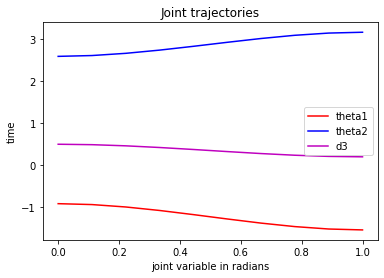

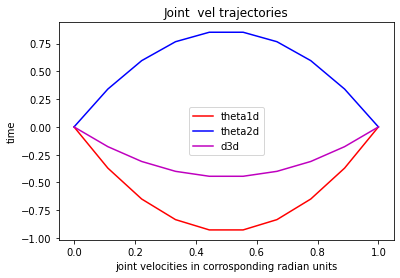

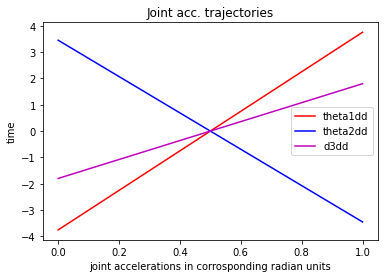

In [60]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, pi, outer, ones, size, linspace

from sympy.physics.mechanics import (dynamicsymbols, ReferenceFrame,Particle, Point)
t= dynamicsymbols('t')
A=[.5, 0.2, 0.5]
B=[0.8,0.7,0.8]
theta_0=Scara_IK_fuction(.5, 0.2, 0.5,a1,a2)
#print(theta_0)

###Initial conditions at t=0 secs
theta_10=theta_0[0]
#print(theta_1)
theta_20=theta_0[1]
d30=theta_0[2]

theta_f=Scara_IK_fuction(0.8,0.7,0.8,a1,a2)
#print(theta_f)
###final conditions at t=tf secs
theta_1f=theta_f[0]
#print(theta_1)
theta_2f=theta_f[1]
d3f=theta_f[2]

# trajectory polynomial
# desired theta_1 plynomial
theta_1=-2*(theta_10-theta_1f)*(t**3)+3*(theta_10-theta_1f)*(t**2)+theta_10
theta_1d=diff(theta_1,t)
theta_1dd=diff(theta_1d,t)
# desired theta_2 plynomial
theta_2=-2*(theta_20-theta_2f)*t**3+3*(theta_20-theta_2f)*t**2+theta_20
theta_2d=diff(theta_2,t)
theta_2dd=diff(theta_2d,t)
#Desired d3 polynomial
d3=-2*(d30-d3f)*t**3+3*(d30-d3f)*t**2+d30
d3d=diff(d3,t)
d3dd=diff(d3d,t)

t1=np.linspace(start = 0, stop = 1, num = 10)



#print(theta_1)
#print(t)
# initialize first joint variable storage variables
theta_1_t=sp.Matrix([0,0,0,0,0,0,0,0,0,0])
theta_1d_t=sp.Matrix([0,0,0,0,0,0,0,0,0,0])
theta_1dd_t=sp.Matrix([0,0,0,0,0,0,0,0,0,0])

# initialize second joint variable storage variables
theta_2_t=sp.Matrix([0,0,0,0,0,0,0,0,0,0])
theta_2d_t=sp.Matrix([0,0,0,0,0,0,0,0,0,0])
theta_2dd_t=sp.Matrix([0,0,0,0,0,0,0,0,0,0])

# initialize third joint variable storage variables
d3_t=sp.Matrix([0,0,0,0,0,0,0,0,0,0])
d3d_t=sp.Matrix([0,0,0,0,0,0,0,0,0,0])
d3dd_t=sp.Matrix([0,0,0,0,0,0,0,0,0,0])
#Tq3=sp.Matrix([0],[0],[0])
for i in range(0,10,1):
  # First joint trajectory values
 theta_1_t[i]=theta_1.subs(t,t1[i])
 theta_1d_t[i]=theta_1d.subs(t,t1[i])
 theta_1dd_t[i]=theta_1dd.subs(t,t1[i])
 # second joint trajectory values
 theta_2_t[i]=theta_2.subs(t,t1[i])
 theta_2d_t[i]=theta_2d.subs(t,t1[i])
 theta_2dd_t[i]=theta_2dd.subs(t,t1[i])
 #Third joint joint trajectory values
 d3_t[i]=d3.subs(t,t1[i])
 d3d_t[i]=d3d.subs(t,t1[i])
 d3dd_t[i]=d3dd.subs(t,t1[i])

# Joint variables
plt.plot(t1,theta_1_t,color='r', label='theta1')
plt.plot(t1,theta_2_t,color='b', label='theta2')
plt.plot(t1,d3_t,color='m', label='d3')
# Add labels and title
plt.title("Joint trajectories")
plt.xlabel("joint variable in radians")
plt.ylabel("time")
plt.legend()
plt.show()

# joint rates
plt.plot(t1,theta_1d_t,color='r', label='theta1d')
plt.plot(t1,theta_2d_t,color='b', label='theta2d')
plt.plot(t1,d3d_t,color='m', label='d3d')
# Add labels and title
plt.title("Joint  vel trajectories")
plt.xlabel("joint velocities in corrosponding radian units")
plt.ylabel("time")
plt.legend()
plt.show()
#Joint accelerations
plt.plot(t1,theta_1dd_t,color='r', label='theta1dd')
plt.plot(t1,theta_2dd_t,color='b', label='theta2dd')
plt.plot(t1,d3dd_t,color='m', label='d3dd')
# Add labels and title
plt.title("Joint acc. trajectories")
plt.xlabel("joint accelerations in corrosponding radian units")
plt.ylabel("time")
plt.legend()
plt.show()




In [52]:
Tq3=sp.Matrix([0,0,0,0,0,0,0,0,0,0])
print("\n G is : ",G)
#stacking above all the joint variables
qdd=[[theta_1dd_t,theta_2dd_t,d3dd_t]]
qd=[[theta_1d_t],[theta_2d_t],[d3d_t]]
print("\n qdd is : ",qdd)
print("\n qdd is : ",qd)
for i in range(0,1,10):
  #Getting numerical values of D and G and C matrices
 D1=D.subs(theta1,theta_1_t[i])
 D2=D1.subs(theta2,theta_2_t[i])
 D3=D2.subs(d3,d3_t[i])
 print("\n D3 is : ",D3)
 C1=C.subs(theta1,theta_1_t[i])
 C2=C1.subs(theta2,theta_2_t[i])
 C3=C2.subs(d3,d3_t[i])
 print("\n C3 is : ",C3)
 G1=G.subs(theta1,theta_1_t[i])
 G2=G1.subs(theta2,theta_2_t[i])
 G3=G2.subs(d3,d3_t[i])
 print("\n G3 is : ",G3)
 Tq3[i]=np.matmul(qdd,D3)+np.matmul(qd,C3)




 G is :  -9.81000000000000

 qdd is :  [[Matrix([
[ -3.75647942347176],
[ -2.92170621825582],
[ -2.08693301303987],
[ -1.25215980782392],
[-0.417386602607974],
[ 0.417386602607974],
[  1.25215980782392],
[  2.08693301303987],
[  2.92170621825581],
[  3.75647942347176]]), Matrix([
[  3.45307537683241],
[  2.68572529309187],
[  1.91837520935134],
[   1.1510251256108],
[ 0.383675041870268],
[-0.383675041870268],
[  -1.1510251256108],
[ -1.91837520935134],
[ -2.68572529309187],
[ -3.45307537683241]]), Matrix([
[-1.8],
[-1.4],
[-1.0],
[-0.6],
[-0.2],
[ 0.2],
[ 0.6],
[ 1.0],
[ 1.4],
[ 1.8]])]]

 qdd is :  [[Matrix([
[                 0],
[ -0.37101031342931],
[-0.649268048501292],
[-0.834773205215947],
[-0.927525783573275],
[-0.927525783573275],
[-0.834773205215947],
[-0.649268048501292],
[ -0.37101031342931],
[                 0]])], [Matrix([
[                0],
[ 0.34104448166246],
[0.596827842909305],
[0.767350083740536],
[0.852611204156151],
[ 0.85261120415615],
[0.767350083740536],
[

ValueError: ignored

In [ ]:
qdd=[[theta_1dd_t,theta_2dd_t,d3dd_t]]
qd=[[theta_1d_t],[theta_2d_t],[d3d_t]]

print(qdd)
print(D)
D1=D.subs(theta1,t1[i])
#EOM=D*q_dd+C*q_d==Tq
#EOM1=np.matmul(D,qdd)
# initialize first joint variable storage variables
Tq_t=sp.Matrix([0,0,0,0,0,0,0,0,0,0])
for i in range(0,10,1):
 D1=D.subs(theta1,t1[i])
 #EOM1= np.matmul(D,qdd)

print(C)